<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vise vannskadedata fra Innsikt for ulike skadeårsaker 

## Importere nødvendige biblioteker


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lese filer lagret lokalt

In [151]:
from google.colab import files
uploaded = files.upload()

Saving naturskade_ikke_pool.xlsx to naturskade_ikke_pool.xlsx
Saving vannskade_frost.xlsx to vannskade_frost (2).xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping (2).xlsx
Saving vannskade_vanninntregning.xlsx to vannskade_vanninntregning (1).xlsx


## Enkel lineær regresjon

In [ ]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det



## Hente data fra importerte filer

In [152]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)

frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_vanninntregning.xlsx',header=None,skiprows=3,names=navn)
nat = pd.read_excel('naturskade_ikke_pool.xlsx',header=None,skiprows=3,names=navn)

data_frost = []
data_til = []
data_inn = []
data_nat = []
for i in år[:-9]:
  frost1 = frost.loc[frost['år']==i,'skade'].sum()
  tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
  intre1 = intre.loc[intre['år']==i,'skade'].sum()
  nat1 = nat.loc[nat['år']==i,'skade'].sum()
  data_frost.append(frost1)
  data_til.append(tilstopp1)
  data_inn.append(intre1)
  data_nat.append(nat1)

## Plotte data

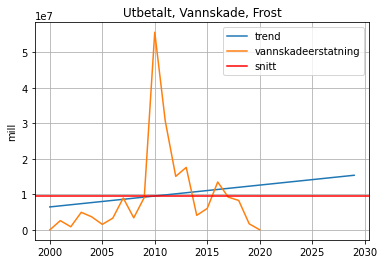

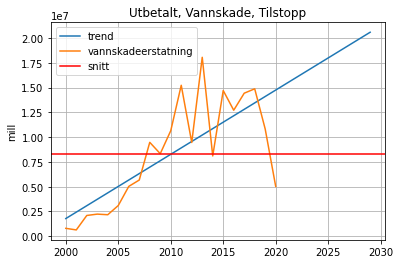

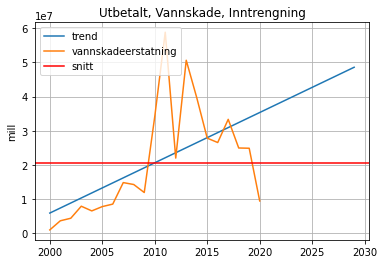

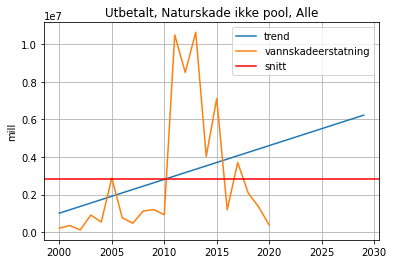

(None, <matplotlib.legend.Legend at 0x7f5b5e16db70>, None)

In [154]:
#Legger på lineær trend

snitt = np.mean(data_frost)
a,b = linreg(range(len(data_frost)),data_frost)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]
plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],data_frost,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Vannskade, Frost")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

snitt = np.mean(data_til)
a,b = linreg(range(len(data_til)),data_til)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]
plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],data_til,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Vannskade, Tilstopp")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

snitt = np.mean(data_inn)
a,b = linreg(range(len(data_inn)),data_inn)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]
plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],data_inn,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Vannskade, Inntrengning")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

snitt = np.mean(data_nat)
a,b = linreg(range(len(data_nat)),data_nat)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]
plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],data_nat,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Naturskade ikke pool, Alle")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

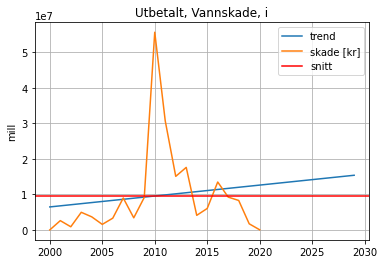

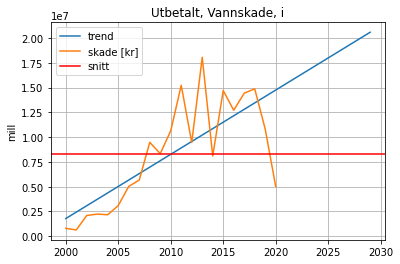

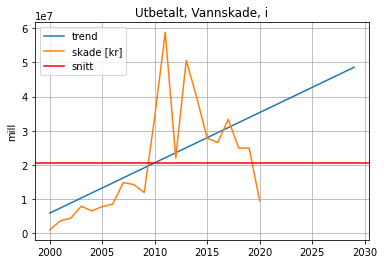

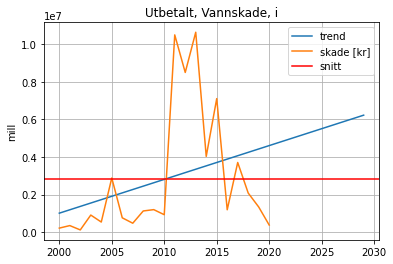

In [180]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])
for i in data_alle:

  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  extrapolatedtrendline=[a*index + b for index in range(len(år))]
  plt.plot(år,extrapolatedtrendline,label="trend")
  plt.plot(år[:-9],i,label="skade [kr]")
  plt.axhline(y=snitt,color='r',label='snitt')
  plt.title('Utbetalt, Vannskade, i')#+str(i))
  plt.ylabel("mill")
  plt.grid(),plt.legend(), plt.show()


In [184]:
for i in data_alle:
  print(data_alle)

[[1.70000000e+03 2.61163800e+06 8.88364000e+05 4.95577160e+06
  3.67214500e+06 1.55652700e+06 3.30681500e+06 8.97388600e+06
  3.40666600e+06 9.12850200e+06 5.55944119e+07 3.06599080e+07
  1.50644699e+07 1.75880670e+07 4.10330600e+06 6.03546300e+06
  1.34741880e+07 9.22883950e+06 8.28534463e+06 1.71991000e+06
  3.37340000e+04]
 [7.97647000e+05 6.38720000e+05 2.09718300e+06 2.23309930e+06
  2.17184700e+06 3.10058200e+06 5.03138400e+06 5.67440900e+06
  9.47945500e+06 8.33393300e+06 1.06496500e+07 1.52388620e+07
  9.46407350e+06 1.80631959e+07 8.10500700e+06 1.47098810e+07
  1.27207168e+07 1.44395160e+07 1.48835835e+07 1.08205508e+07
  5.03101075e+06]
 [1.03949100e+06 3.70510100e+06 4.45145600e+06 7.96738300e+06
  6.59846100e+06 7.85546100e+06 8.58703300e+06 1.48729890e+07
  1.43097615e+07 1.19716080e+07 3.41402970e+07 5.88230784e+07
  2.20422800e+07 5.06317762e+07 3.97149818e+07 2.78625310e+07
  2.65837252e+07 3.33634240e+07 2.49893086e+07 2.49140035e+07
  9.50969802e+06]
 [2.16597000e+05

In [176]:
# data_alle[:,0]

IndexError: ignored